In [1]:
import os
from tqdm.auto import tqdm
import re
from scipy.spatial import distance

In [1]:
os.listdir('Projects/pb-stylistic/ridero10')

NameError: name 'os' is not defined

In [5]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [6]:
from collections import Counter

In [7]:
import pandas as pd
import numpy as np
polka_catalog = pd.read_csv('collection_catalog_full_final.csv', sep=';', )[['book_title', 'fbusta_id']]

In [48]:
polka_catalog

,book_title,fbusta_id
0,Братья и сестры,158030
1,Две зимы и три лета,158033
2,Пути-перепутья,158036
3,Дом,158032
4,Дюжина ножей в спину революции,159215
...,...,...
639,Заговор равных,391821
640,Казароза,119201
641,Костюм Арлекина,24680
642,Князь ветра,76325


In [53]:
dir_in = 'txt_cut'
dir_out = 'ridero10/polka/raw_chunks'

os.mkdir('ridero10/polka')
os.mkdir(dir_out)
for name in tqdm(os.listdir(dir_in)):
    if name.startswith('.') or name == 'raw_chunks':
        continue
    with open(os.path.join(dir_in, name)) as f:
        content = f.read().strip()
        content = content.replace('?..', '?').replace('!..', '!').replace('...', '…').replace('--', '–')
        content = re.sub('[…]+', ' … ', content)
        content = re.sub('\s+', ' ', content)
        content = re.sub('[_]+', '_', content)
        content = re.sub('[\n]+', ' \n ', content)
        content = re.sub('[*]+', '*', content)
        content = re.sub('\xa0', ' ', content)
        text = content.split(' ')
        for i, chunk in enumerate(chunks(text, 1050)):
            if len(chunk) < 500:
                continue
            with open(os.path.join(dir_out, name + f'_{i}'), 'w') as ff:
                ff.write(' '.join(chunk))

In [130]:
dir_out = 'ridero10/polka/raw_chunks'
# os.mkdir('ridero10/polka/chunks_mystem')
for i in tqdm(os.listdir(dir_out)):
    !~/Projects/pb-stylistic/mystem --format=text -wgnlid ~/Projects/pb-stylistic/ridero10/polka/raw_chunks/{i} ~/Projects/pb-stylistic/ridero10/polka/chunks_mystem/{i}

In [132]:
%%time

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords 
russian_stopwords = set(stopwords.words("russian"))

dir_in = 'ridero10/polka/chunks_mystem'
dir_out = 'ridero10/polka/chunks_mystem_processed'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

for name in tqdm(sorted(os.listdir(dir_in))):
    with open(os.path.join(dir_in, name)) as f:
        res = []
        for line in f:
            try:
                w, r = line.split('=', 1)
                if 'имя,' in r or 'фам,' in r or 'отч,' in r:
                    raise
                if not r.startswith(('S,', 'S=')):
                    raise
                res.append(w)
            except:
                continue
        with open(os.path.join(dir_out, name), 'w') as ff:
            ff.write(' '.join(res))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/artesby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



CPU times: user 9.55 s, sys: 665 ms, total: 10.2 s
Wall time: 9.45 s


In [133]:
dir_out = 'ridero10/raw_chunks'
os.mkdir('ridero10/chunks_mystem')
for i in tqdm(os.listdir(dir_out)):
    !~/Projects/pb-stylistic/mystem --format=text -wgnlid ~/Projects/pb-stylistic/ridero10/raw_chunks/{i} ~/Projects/pb-stylistic/ridero10/chunks_mystem/{i}

In [134]:
%%time

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords 
russian_stopwords = set(stopwords.words("russian"))

dir_in = 'ridero10/chunks_mystem'
dir_out = 'ridero10/chunks_mystem_processed'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

for name in tqdm(sorted(os.listdir(dir_in))):
    with open(os.path.join(dir_in, name)) as f:
        res = []
        for line in f:
            try:
                w, r = line.split('=', 1)
                if 'имя,' in r or 'фам,' in r or 'отч,' in r:
                    raise
                if not r.startswith(('S,', 'S=')):
                    raise
                res.append(w)
            except:
                continue
        with open(os.path.join(dir_out, name), 'w') as ff:
            ff.write(' '.join(res))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/artesby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



CPU times: user 139 ms, sys: 25.3 ms, total: 164 ms
Wall time: 137 ms


In [5]:
os.chdir('Projects/pb-stylistic')

In [11]:
import artm
model = artm.load_artm_model(f'S_maxdf6_100_400_prolly_best')

In [29]:
ids = sorted(os.listdir(f'ridero10/polka/chunks_processed/'))

In [135]:
ids = []
with open(f'ridero10/polka/wv_processed.txt', 'w') as f1:
    i = 0
    for f in tqdm(sorted(os.listdir(f'ridero10/polka/chunks_mystem_processed/'))):
        with open(f'ridero10/polka/chunks_mystem_processed/' + f) as doc:
            tokens = doc.read().replace('?', '').replace('\n', ' ').split()
            doc_voc = Counter(tokens)
            s = ' '.join(f'{w}:{c}' for w, c in sorted(doc_voc.items()))
            row = f'{f.replace(" ", "_").replace(":", "")} {s}\n'
            f1.write(row)
            ids.append(f)

In [73]:
ids_ridero10 = sorted(os.listdir(f'ridero10/chunks_processed/'))

In [8]:
ids_ridero10 = []
with open(f'ridero10/wv_processed_same.txt', 'w') as f1:
    i = 0
    for f in tqdm(sorted(os.listdir(f'ridero10/chunks_mystem_processed/'))):
        if not f.endswith('_1'):
            continue
        with open(f'ridero10/chunks_mystem_processed/' + f) as doc:
            tokens = doc.read().replace('?', '').replace('\n', ' ').split()
            doc_voc = Counter(tokens)
            s = ' '.join(f'{w}:{c}' for w, c in sorted(doc_voc.items()))
            row = f'{f.replace(" ", "_").replace(":", "")} {s}\n'
            f1.write(row)
            ids_ridero10.append(f)

In [12]:
polka_batch_vectorizer = artm.BatchVectorizer(data_path=f'ridero10/polka/wv_processed.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'ridero10/polka/batches_processed')

In [13]:
ridero10_batch_vectorizer = artm.BatchVectorizer(data_path=f'ridero10/wv_processed.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'ridero10/batches_processed')

In [108]:
with open(f'ridero10/wv_test.txt', 'w') as f1:
    i = 0
    for f in tqdm(sorted(os.listdir(f'ridero10/chunks_processed/'))):
        if not f.startswith('akademiya_magii_oksana_ivchenko'):
            continue
        with open(f'ridero10/chunks_processed/' + f) as doc:
            tokens = doc.read().replace('?', '').replace('\n', ' ').split()
            doc_voc = Counter(tokens)
            s = ' '.join(f'{w}:{c}' for w, c in sorted(doc_voc.items()))
            row = f'{f.replace(" ", "_").replace(":", "")} {s}\n'
            f1.write(row)

In [15]:
model.reshape_topics([f'topic_{i}' for i in range(100, 500)])

In [16]:
ridero_t = model.transform(ridero10_batch_vectorizer)
polka_t = model.transform(polka_batch_vectorizer)

In [109]:
test_batch = artm.BatchVectorizer(data_path=f'ridero10/wv_test.txt',
                                        data_format='vowpal_wabbit',
                                        target_folder=f'ridero10/batches_test')

In [111]:
test_t = model.transform(test_batch)

In [19]:
distances = distance.cdist(ridero_t.T, polka_t.T, metric=distance.jensenshannon)

In [20]:
distances

array([[0.81524902, 0.81824564, 0.80399663, ..., 0.80375999, 0.76550396,
        0.77844707],
       [0.80153317, 0.80454048, 0.80987387, ..., 0.78384452, 0.76568793,
        0.77676624],
       [0.75557179, 0.76752567, 0.74769257, ..., 0.7247608 , 0.74911869,
        0.72015209],
       ...,
       [0.74480234, 0.74378275, 0.75823707, ..., 0.78297991, 0.79476494,
        0.79645402],
       [0.80604811, 0.79388003, 0.77859149, ..., 0.80113955, 0.80962601,
        0.76930315],
       [0.77542572, 0.73198829, 0.7322725 , ..., 0.7914806 , 0.79748206,
        0.76459093]])

In [24]:
foros.listdir('ridero10/evaluation')

['33', '24', '15', '10', '6', '29', '20', 'achieved 12.11 bad.7z', '2', '37']

In [31]:
old_ids = """468939.fb2.txt_6
143082.fb2.txt_7
28799.fb2.txt_3
169333.fb2.txt_0
24680.fb2.txt_1
185862.fb2.txt_7
76721.fb2.txt_5
232264.fb2.txt_5
185965.fb2.txt_6
173143.fb2.txt_5
441225.fb2.txt_1
58521.fb2.txt_8
160794.fb2.txt_7
173155.fb2.txt_7
183128.fb2.txt_3
168343.fb2.txt_3
225656.fb2.txt_5
343914.fb2.txt_4
320065.fb2.txt_7
50901.fb2.txt_1
497239.fb2.txt_0
133556.fb2.txt_0
317595.fb2.txt_4
239744.fb2.txt_6
133556.fb2.txt_2
365649.fb2.txt_1
376834.fb2.txt_3""".split('\n')

In [70]:
import scipy.stats as stats

In [80]:
print('old_model', ' eval_1',  '  eval_2', ' newmodel')
o1 = []
o2 = []
n1 = []
n2 = []
e = []
for i in range(9):
    ds = distances[i][[ids.index(old_ids[j]) for j in range(i*3, i*3+3)]].argsort()
    o1.append(stats.kendalltau(ground1[i], [0, 1, 2]))
    o2.append(stats.kendalltau(ground2[i], [0, 1, 2]))
    n1.append(stats.kendalltau(ground1[i], ds))
    n2.append(stats.kendalltau(ground2[i], ds))
    e.append(stats.kendalltau(ground1[i], ground2[i]))
    print('', np.array([0, 1, 2]),'', ground1[i], '', np.array(ground2[i]))
print('mean t kendall between old & eval_1:', np.mean(o1))
print('mean t kendall between old & eval_2:', np.mean(o2))
print('mean t kendall between new & eval_1:', np.mean(n1))
print('mean t kendall between new & eval_2:', np.mean(n2))
print('mean t kendall between eval_1 & eval_2:', np.mean(e))

old_model  eval_1   eval_2  newmodel
 [0 1 2]  [0 2 1]  [0 2 1]
 [0 1 2]  [1 0 2]  [1 0 2]
 [0 1 2]  [1 0 2]  [2 0 1]
 [0 1 2]  [2 0 1]  [2 0 1]
 [0 1 2]  [1 0 2]  [1 0 2]
 [0 1 2]  [0 1 2]  [0 2 1]
 [0 1 2]  [1 0 2]  [0 2 1]
 [0 1 2]  [2 1 0]  [1 2 0]
 [0 1 2]  [2 0 1]  [2 1 0]
mean t kendall between old & eval_1: 0.48148148148148157
mean t kendall between old & eval_2: 0.44444444444444453
mean t kendall between new & eval_1: 0.4074074074074074
mean t kendall between new & eval_2: 0.5185185185185186
mean t kendall between eval_1 & eval_2: 0.6296296296296297


In [55]:
ground2 = [[0, 2, 1], [1, 0, 2], [2, 0, 1], [2, 0, 1], [1, 0, 2], [0, 2, 1], [0, 2, 1], [1, 2, 0], [2, 1, 0]]

In [56]:
ground= """Папка 1: 0-2-1
Папка 5: 1-0-2
Папка 9: 1-0-2
Папка 14: 2-0-1
Папка 19: 1-0-2
Папка 23: 0-1-2
Папка 28: 1-0-2
Папка 32: 2-1-0
Папка 36: 2-0-1""".split('\n')
ground1 = [np.array([int(s) for s in g.split()[-1].split('-')]) for g in ground ]
ground1

[array([0, 2, 1]),
 array([1, 0, 2]),
 array([1, 0, 2]),
 array([2, 0, 1]),
 array([1, 0, 2]),
 array([0, 1, 2]),
 array([1, 0, 2]),
 array([2, 1, 0]),
 array([2, 0, 1])]

In [112]:
topics=test_t.T.iloc[1].sort_values()[-10:]
model_tokens = model.score_tracker['TopTokensScore10'].last_tokens
for t, w in topics.items():
    print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')

0.032*topic_326:франция испания дворянин правление королевство титул интрига претендент
0.032*topic_356:человек
0.032*topic_493:белье ведро полотенце ванна тряпка ванная кран мыло
0.032*topic_403:маг магия демон заклинание чародей амулет заклятие гильдия
0.045*topic_135:девушка марина подопечная смуглянка дикарка
0.045*topic_478:подруга подружка незнакомка помада косметика макияж милочка вероника
0.045*topic_342:студент университет экзамен институт преподаватель учеба лекция диплом
0.057*topic_421:мир ангел максвелл сотворение затворник мироустройство множественность социум
0.101*topic_365:доктор врач больной пациент клиника лечение хирург софия
0.115*topic_495:князь боярин княгиня воевода русь киев дружина грамота


In [139]:
ridero10 = model.transform(ridero10_batch_vectorizer)

In [140]:
polka = model.transform(polka_batch_vectorizer)

In [142]:
topics=ridero10.T.iloc[-1].sort_values()[-10:]
model_tokens = model.score_tracker['TopTokensScore10'].last_tokens
for t, w in topics.items():
    print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')

0.025*topic_219:клуб команда мяч спорт тренер соревнование спортсмен секция
0.027*topic_157:жених матушка коса царица нянька рабыня жемчуг роды
0.027*topic_161:вера царство посол мудрость султан мудрец посланец чужеземец
0.027*topic_370:яд обряд ложе чума греза эпидемия мазь недуг
0.038*topic_280:раса колония портал форт лига федерация стратегия колонист
0.038*topic_112:цирк карлик кнут арена клоун сакс британия язычник
0.039*topic_337:мозг энергия лаборатория прибор эксперимент вещество частица измерение
0.059*topic_484:враг бой противник боец раненый атака схватка фляга
0.081*topic_315:корабль отсек двигатель управление контейнер система борт люк
0.089*topic_394:звезда планета вселенная пришелец землянин марс галактика инопланетянин


In [43]:
model.reshape_topics([f'topic_{i}' for i in range(100, 500)])

In [141]:
topics=ridero10.T.iloc[6].sort_values()[-10:]
model_tokens = model.score_tracker['TopTokensScore10'].last_tokens
for t, w in topics.items():
    print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')

0.023*topic_322:академия рама чертеж качели оранжерея риза линь художество
0.023*topic_477:башня наемник страж таверна гвардеец сталь горец тракт
0.033*topic_244:чаша пленник ступня сосуд жрица туника весы хрип
0.033*topic_273:камень гнездо трещина камешек валун ящерица уступ выступ
0.042*topic_422:костюм блондинка галстук красотка блондин картер дамочка жакет
0.042*topic_233:здание вход постройка фасад архитектура архитектор пристройка хьюстон
0.042*topic_277:толпа фонтан площадь зевака выкрик шествие гомон ропот
0.051*topic_421:мир ангел максвелл сотворение затворник мироустройство множественность социум
0.061*topic_403:маг магия демон заклинание чародей амулет заклятие гильдия
0.126*topic_342:студент университет экзамен институт преподаватель учеба лекция диплом


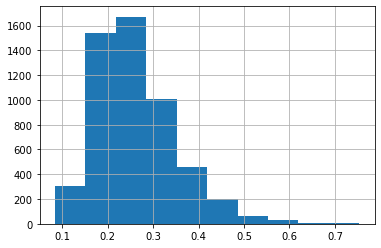

In [144]:
model.transform(polka_batch_vectorizer).T.apply(lambda x: sum(sorted(x)[-3:]), axis=1).hist()

In [53]:
%matplotlib inline

In [143]:
distances = distance.cdist(ridero10.T, polka.T, metric=distance.jensenshannon)

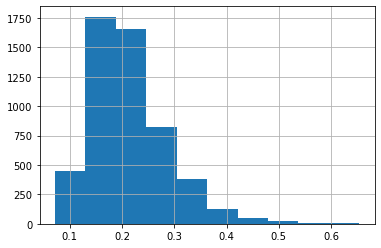

In [183]:
models[3].transform(polka_batch_vectorizer).T.apply(lambda x: sum(sorted(x)[-3:]), axis=1).hist()

In [193]:
qq = models[3].transform(polka_batch_vectorizer).T.apply(lambda x: sum(sorted(x)[-3:]), axis=1)

In [194]:
qq.sort_values()

2246    0.071530
1874    0.075670
3975    0.076854
2152    0.077236
3972    0.077853
          ...   
2937    0.596551
2380    0.603063
4777    0.616054
420     0.638732
4775    0.654054
Length: 5293, dtype: float64

In [197]:
ids[4775]

'70498.fb2.txt_0'

In [201]:
polka.T.loc[4775].sort_values()

topic_0      0.000000
topic_265    0.000000
topic_263    0.000000
topic_262    0.000000
topic_260    0.000000
               ...   
topic_251    0.029270
topic_307    0.031126
topic_13     0.033154
topic_149    0.049164
topic_393    0.571737
Name: 4775, Length: 400, dtype: float32

In [21]:
model_tokens = models[3].score_tracker['TopTokensScore10'].last_tokens

In [206]:
model_tokens['topic_393']

['весть',
 'кролик',
 'горожанин',
 'гонец',
 'укрепление',
 'осада',
 'удав',
 'бойница',
 'огрызок',
 'бастион']

In [157]:
q = model.transform(polka_batch_vectorizer)

In [158]:
model.get_score('PerplexityScore')

value: 301.5580749511719
raw: -7003915.136891279
normalizer: 1226828.0
zero_words: 318061

In [156]:
model.score_tracker['PerplexityScore'].

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [188]:
polka.T

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_390,topic_391,topic_392,topic_393,topic_394,topic_395,topic_396,topic_397,topic_398,topic_399
4000,0.000000,0.000000,0.012957,0.012213,0.013846,0.000000,0.0,0.000000,0.005830,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4001,0.008439,0.006097,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.007160,0.0
4002,0.006508,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.013222,0.0,...,0.00000,0.000000,0.012436,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4003,0.036894,0.000000,0.005506,0.006669,0.000000,0.005577,0.0,0.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.009485,0.0,0.0,0.000000,0.0
4004,0.032039,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0.006621,0.000000,0.0,0.0,0.001721,0.0,0.0,0.016688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.011486,0.005468,0.006346,0.000000,0.000000,0.0,0.000000,0.017181,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.012654,0.0
3996,0.000000,0.000000,0.022919,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0.000000,0.005505,0.0,0.0,0.000000,0.0,0.0,0.005675,0.0
3997,0.007176,0.005962,0.000000,0.000000,0.013554,0.000000,0.0,0.006004,0.007545,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.014017,0.0
3998,0.006346,0.000000,0.000000,0.011861,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.006453,0.0


In [145]:
import shutil
# shutil.copy('/etc/hostname', '/var/tmp/testhostname')

In [126]:
for i, idxes in enumerate(distances.argsort()[:, [0, len(distances[0]) // 2, len(distances[0])-1]]):
    if ids_ridero10[i].endswith('_2'):
        try:
            os.mkdir(f'ridero10/evaluation')
        except:
            pass
        try:
            os.mkdir(f'ridero10/evaluation/{i}')
        except:
            pass
        shutil.copy(f'ridero10/raw_chunks/{ids_ridero10[i]}', f'ridero10/evaluation/{i}/{ids_ridero10[i]}.txt')
        for j, idx in enumerate(idxes):
            shutil.copy(f'ridero10/polka/raw_chunks/{ids[idx]}', f'ridero10/evaluation/{i}/{2-j}.txt')
            
        
    
#     print(i, ids_ridero10[i])
#     for t, w in ridero10.T.iloc[i].sort_values()[-3:].items():
#         print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')
#     print('Most similar to:', idx, ids[idx])
#     for t, w in polka.T.iloc[idx].sort_values()[-3:].items():
#         print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')
#     print('similarity:', round(distances[i][idx], 3))
#     print()

In [30]:
distances.argsort()[:, 0]

array([5120, 4167, 1612, 2299, 3856, 4526, 3255, 1115, 2725, 1906,  902,
       2725, 2027, 2089, 4610, 3439, 2799, 2597, 3241, 3252, 3053,  408,
       1459, 4340, 3406, 2869,  317, 4498,  842, 4301, 2706, 2673, 2673,
       3913, 4606, 2680, 2675, 2680, 2678])

In [146]:

for i, idx in enumerate(distances.argsort()[:,0]):
    print(i, ids_ridero10[i])
    for t, w in ridero10.T.iloc[i].sort_values()[-3:].items():
        print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')
    print('Most similar to:', idx, ids[idx])
    for t, w in polka.T.iloc[idx].sort_values()[-3:].items():
        print(f'{round(w, 3)}*{t}:{" ".join(model_tokens[t][:8])}')
    print('similarity:', round(distances[i][idx], 3))
    print()

0 3_storoni_markus_whels.txt_0
0.051*topic_356:человек
0.053*topic_326:франция испания дворянин правление королевство титул интрига претендент
0.065*topic_433:город площадь парка
Most similar to: 3205 366383.fb2.txt_5
0.05*topic_252:лошадь конюшня кобыла конюх амбар загон стойло овес
0.078*topic_101:солдат строй сражение легион ветеран шеренга легионер новобранец
0.086*topic_414:отряд полк сабля засада знамя караул шашка дозор
similarity: 0.67

1 3_storoni_markus_whels.txt_1
0.068*topic_326:франция испания дворянин правление королевство титул интрига претендент
0.072*topic_148:перчатка тренировка зритель упражнение чемпион бокс канат боксер
0.074*topic_112:цирк карлик кнут арена клоун сакс британия язычник
Most similar to: 1651 186744.fb2.txt_8
0.041*topic_303:ступень телохранитель капюшон перстень одеяние трость светильник зала
0.071*topic_151:шеф чемодан метро проводник багаж платформа попутчик носильщик
0.086*topic_112:цирк карлик кнут арена клоун сакс британия язычник
similarity: 0

In [ ]:
305, 394, 380, 394, 315, 484, 351

In [114]:
t495 = model.phi_.T.loc['topic_495']
t495 = t495[t495 > 0]
tokens = [w[1] for w in t495.index]

In [104]:
t495[('@default_class', 'весь') ]

0.00097293546

In [76]:
kernel = "княж царьград псков детинец новгородец ладога князек княжич княгиня княжество князь русич воевода ведун волхов смерд русь дружинник дружина посад городище новгород грамота полон перун рать гривна орда смоленск терем холоп ладья тать московия боярин вече хазар волхв рязань днепр печенег киев гусли княжна чернигов тверь сеча киевлянин посадский ворог тын лях муром былина ратник"

In [96]:
for w in tokens:
    if w in open('ridero10/chunks_processed/akademiya_magii_oksana_ivchenko.txt_1').read().split():
        print(w)

сум
истукан
помысел
софия
весь


In [115]:
for w in tokens:
    if w in open('ridero10/polka/chunks_processed/2713.fb2.txt_1').read().split():
        print(w)

весь


In [2]:
import artm
model = artm.load_artm_model('S_topics_maxdf_100+400')

In [3]:
import wordcloud

In [9]:
%matplotlib inline

from matplotlib import pyplot as plt

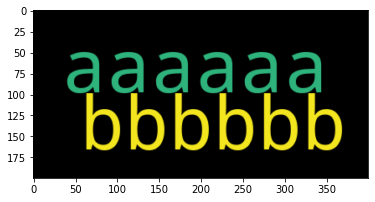

In [14]:
w = wordcloud.WordCloud().generate_from_frequencies([])
plt.imshow(w, interpolation='bilinear')

In [24]:
import numpy as np

In [35]:
topics = [f'topic_{i}' for i in [305, 394, 380, 394, 315, 484, 351]]

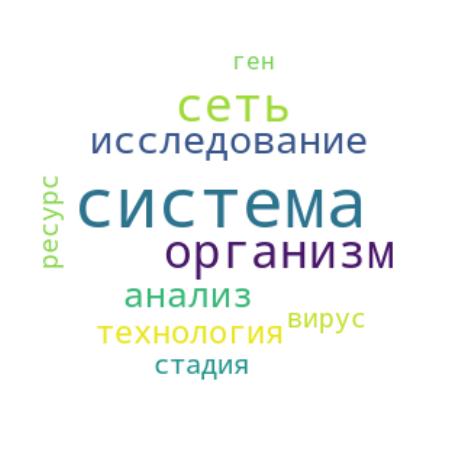

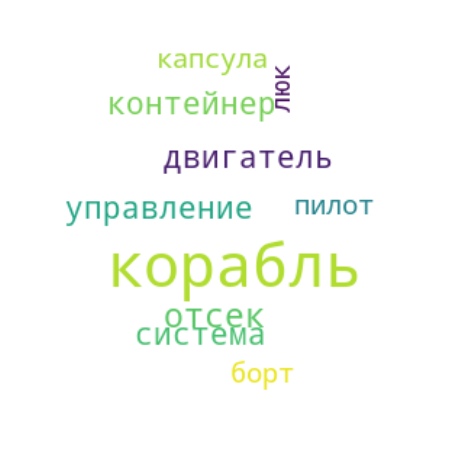

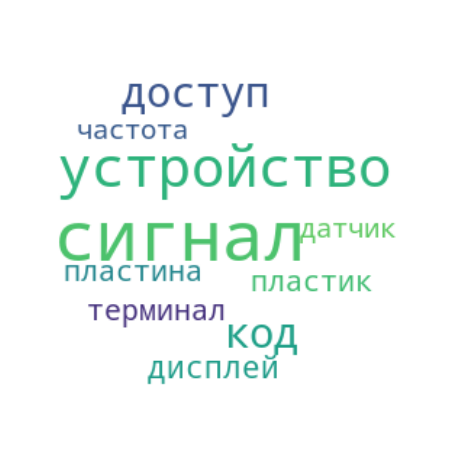

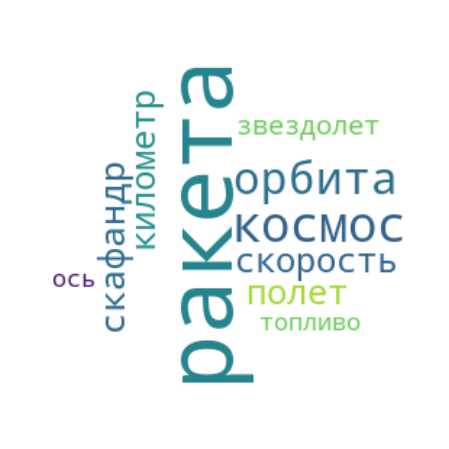

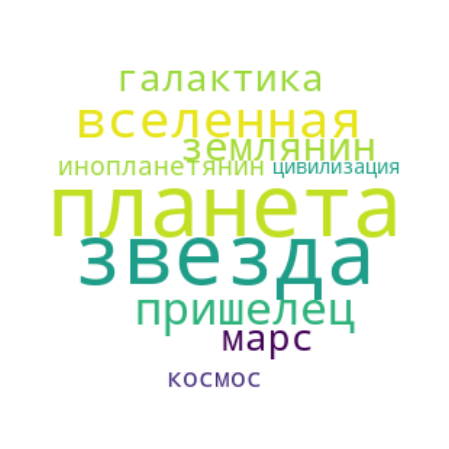

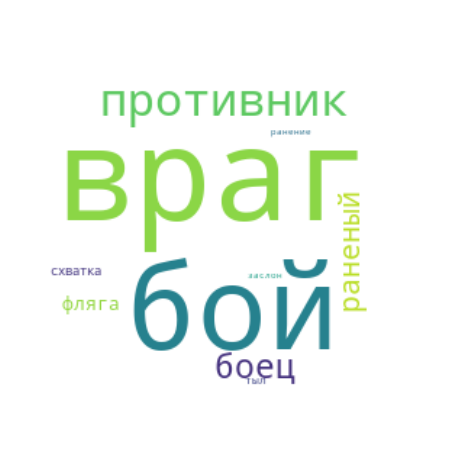

In [38]:
for topic, words in model.score_tracker['TopTokensScore10'].last_tokens.items():
    if topic not in topics:
        continue
    weights = [w for w in model.score_tracker['TopTokensScore10'].last_weights[topic] if w > 0]
    plt.figure(figsize=(12, 8))
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    w = wordcloud.WordCloud(background_color='white', collocations=False, mask=mask).generate_from_frequencies(dict(zip(words, 10*weights)))
    plt.axis("off")
    plt.imshow(w, interpolation='bilinear', )